<a href="https://colab.research.google.com/github/enerhy/fmi-cv/blob/main/Introduction_ComputerVision_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial in Image Processing

This tutorial demonstrates some major Image Processing concepts on practical examples. Topics included: <br>
* Image Loading 
* Histogramm examination
* Contast enhancement techniqes
* Thresholding techniques
* Convolutional operations 
* Edge Detection with Gradients (Sobel and Canny)
* Contours detection and use

The code utilizes some of the most widly used Image Processing libraries.



In [ ]:
import numpy as np
from PIL import Image
import cv2
from skimage import data
import matplotlib.pyplot as plt

# Load images

Load with PIL

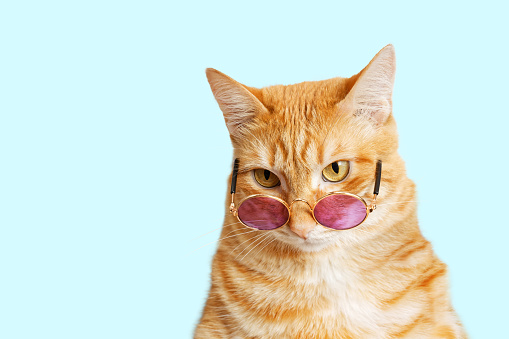

In [ ]:
import io
import urllib.request

url = 'https://media.istockphoto.com/photos/closeup-portrait-of-funny-ginger-cat-wearing-sunglasses-isolated-on-picture-id1253696116?b=1&k=20&m=1253696116&s=170667a&w=0&h=on5OoVflqZxsocVCoiJjubwY2dF6QwBopf3bXxBSfrs='

# Download the image in the working directory 
urllib.request.urlretrieve(url, "image.png")

# Open
Image.open("image.png")

It is convinient to store an image as a numpy array. Lets do this

In [ ]:
img_path = "image.png"
image_array = np.array(Image.open(img_path))

In [ ]:
image_array.shape

(339, 509, 3)

In [ ]:
# We can plot an image array using matplotlib

def show_image(image, title='Image', cmap_type='gray', large_size=True):
    if large_size:
      plt.figure(figsize = (12,12))
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    plt.show()

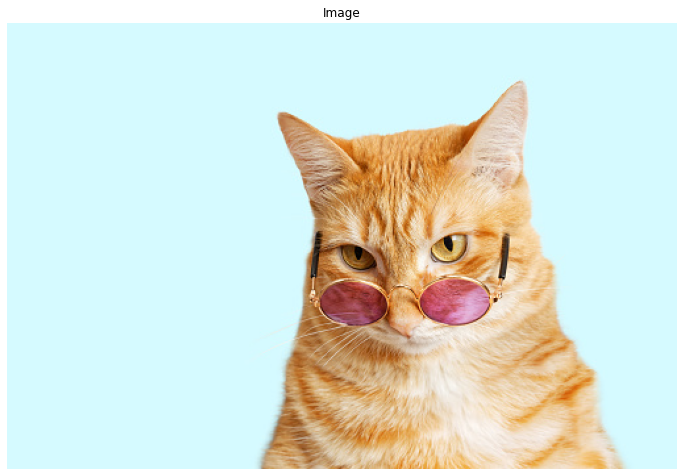

In [ ]:
show_image(image_array)

OpenCV is a library that ofers a very rich fuctionalities for image processing and analysis. So let's load an image with OpenCV. <br> We can load an imageg from an URL without saving it to the disk.

In [ ]:
"""Get an image from an URL"""

# Specify url: url and build a function to load an image from an url
import urllib.request

def load_from_url(url):
    
    img = urllib.request.urlopen(url)

    img = np.array(bytearray(img.read()), dtype=np.uint8)
    img = cv2.imdecode(img, 1)
    return img

Take a look at the image: [IMAGE](https://image.freepik.com/free-photo/wooden-heart-with-ball-yarn_23-2147999735.jpg) <br> Than we will load it and display it in the notebook.

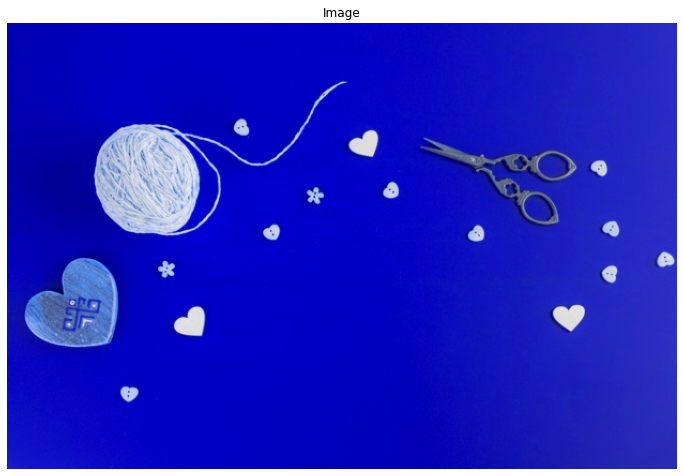

In [ ]:
url = 'https://image.freepik.com/free-photo/wooden-heart-with-ball-yarn_23-2147999735.jpg'
img_tools = load_from_url(url)

# Print the shape
show_image(img_tools)

The Image is not properly displayed. This is because OpenCV stores the images in BGR but matplotlib requires RGB in order to display properly. <br> So we will define a function to reorder the channels



In [ ]:
# Lets define a function to turn BGR to RGB Color scheem

def BGR2RGB(img):
    img_new = np.zeros(img.shape, dtype=np.uint8)
    img_new[:,:,0] = img[:,:,2]
    img_new[:,:,1] = img[:,:,1]
    img_new[:,:,2] = img[:,:,0]
    return img_new

# We can use also a build in function from opencv
# cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

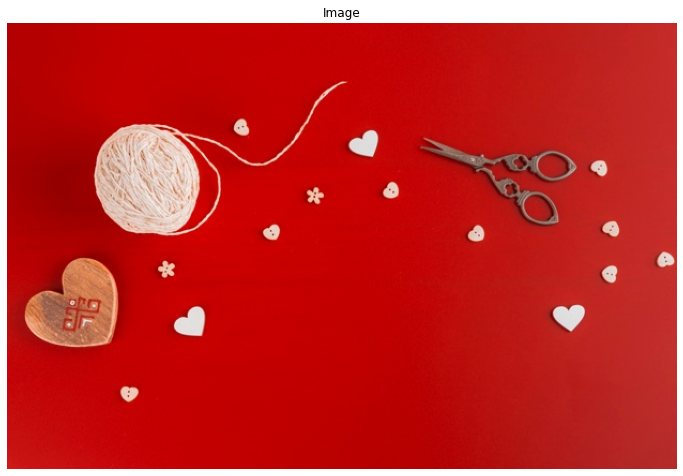

In [ ]:
img_tools = BGR2RGB(img_tools)
show_image(img_tools)

# Now get some image properties

In [ ]:
# Get the shape of the image
print('Image shape is: ', img_tools.shape)

Image shape is:  (417, 626, 3)


We can plot the different image channels

In [ ]:
def plot_channels(img_array, channels = ['Red', 'Green', 'Blue']):
    plt.figure(figsize=(20, 12))
    
    for i, channel in enumerate(['Red', 'Green', 'Blue']):
        
        if len(channels) > 1:
            sp = plt.subplot(1, 3, i+1)
            sp.axis('off')
            plt.title(channel)
            plt.imshow(img_array[:,:,i], cmap='gray')
        else:
            plt.title(channel)
            plt.axis('off')
            plt.imshow(img_array, cmap=cmap_type)
    
    plt.show()

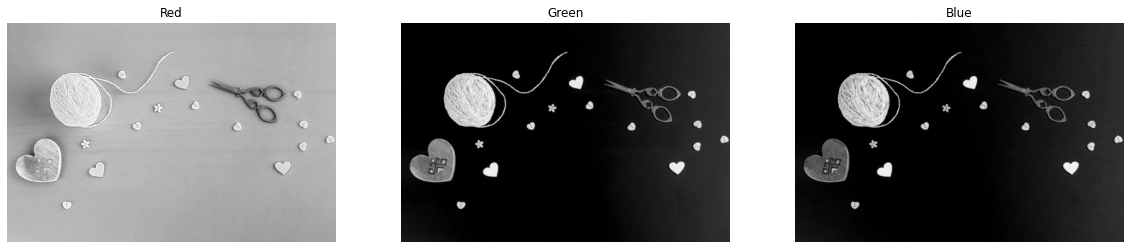

In [ ]:
plot_channels(img_tools)

We can plot also their respective histogram

In [ ]:
def show_histogram(img_array, channels = ['Red', 'Green', 'Blue']):
    for i, channel in enumerate(channels):
        if len(channels) > 1:
            channel_array = img_array[:, :, i]
            plt.hist(channel_array.ravel(), bins=256)
            title = 'Histogram ' + channel
            plt.title(title)
            plt.show()
        else:
            plt.hist(img_array.ravel(), bins=256)
            title = 'Histogram ' + channel
            plt.title(title)
            plt.show()

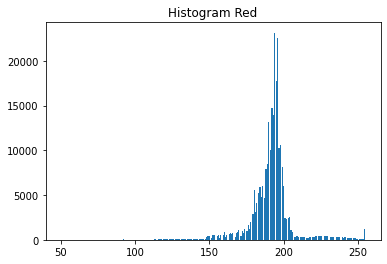

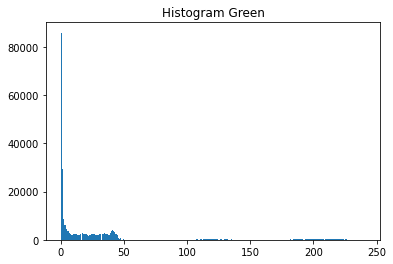

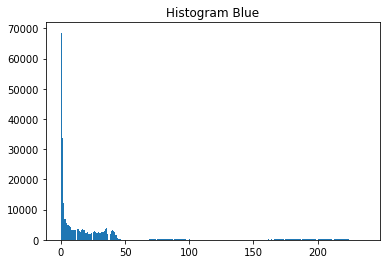

In [ ]:
show_histogram(img_tools)

# Thresholding

1. Turn into Grayscale 
2. Choose a thresh of pixel intesity (all pixels with lower intensity will be shown black and the others white) based on the image's histogramm
3. Apply the trheshhold to binarize the image

In [ ]:
from skimage import color

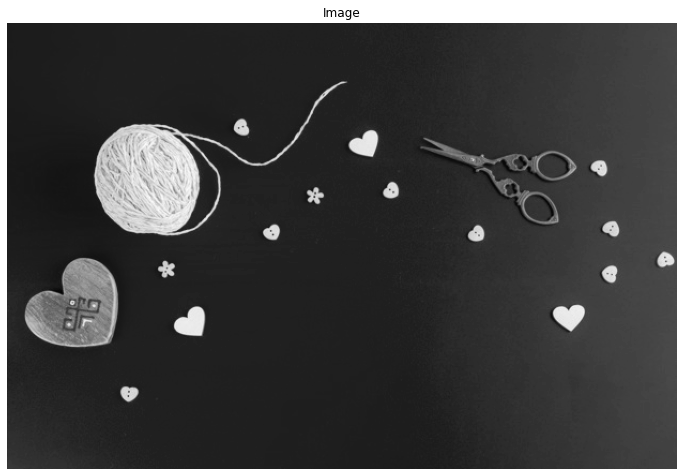

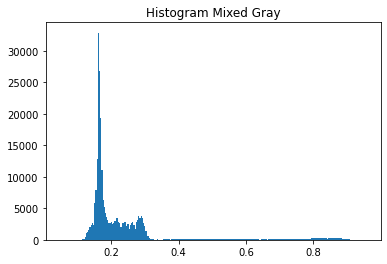

In [ ]:
image_gray = color.rgb2gray(img_tools) # Y = 0.2125 R + 0.7154 G + 0.0721 B
show_image(image_gray)
show_histogram(image_gray, channels=['Mixed Gray']) 

In [ ]:
# Note that the image was normalized 
print('Min value is {} \nMax value is {}'.format(image_gray.min(), image_gray.max()))

Min value is 0.049999999999999996 
Max value is 0.9542349019607844


**Selecting a threshold**

There are different methods to define optimal threshold.<br>
One way is to just look at a histogramm and decide which value separates the majority of the pixels best.<br>

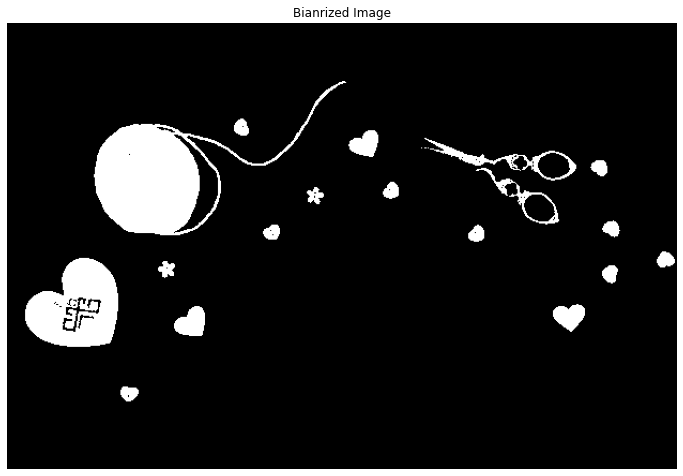

In [ ]:
# Select a thresh

thresh = 0.37
binary_gray = image_gray > thresh

show_image(binary_gray, 'Bianrized Image')

Or we can use skimage library to look at differnt advance methods

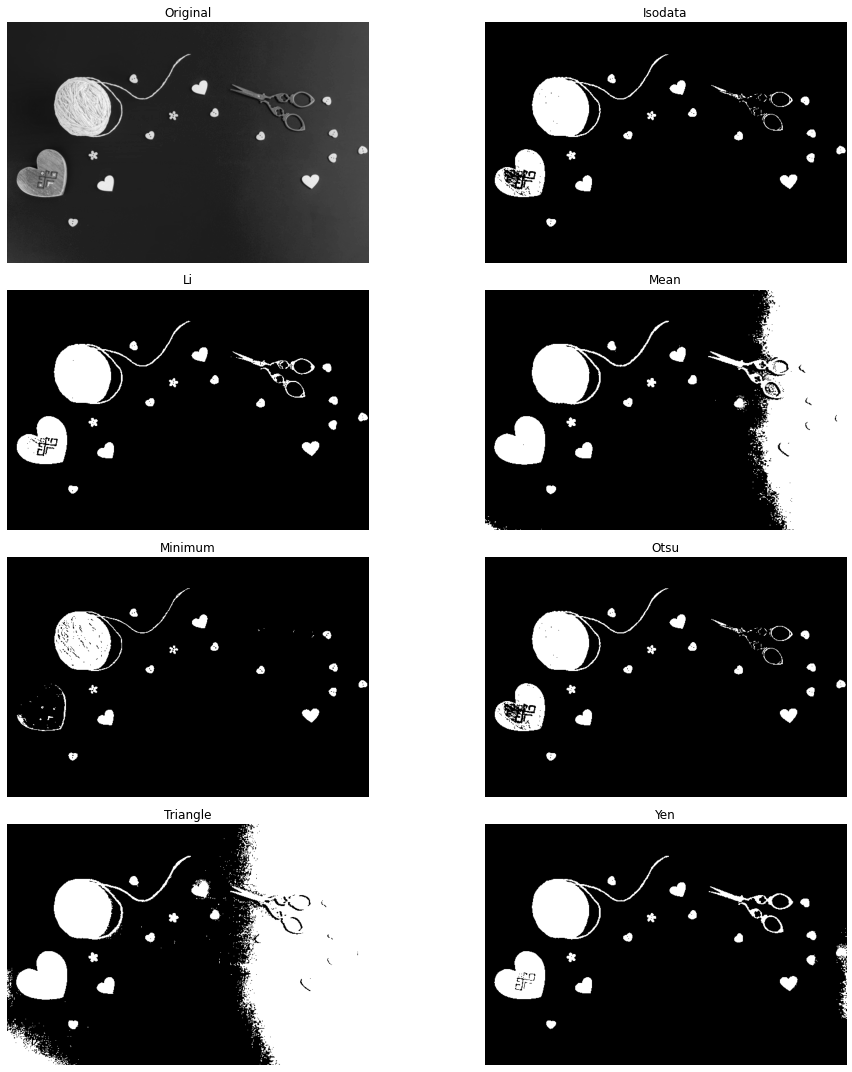

In [ ]:
from skimage.filters import try_all_threshold

# Obtain all the resulting 
imagesfig, ax = try_all_threshold(image_gray, figsize=(15, 15), verbose=False)
# Showing resulting plots
plt.show()

Apply one of the method and check the thresh value

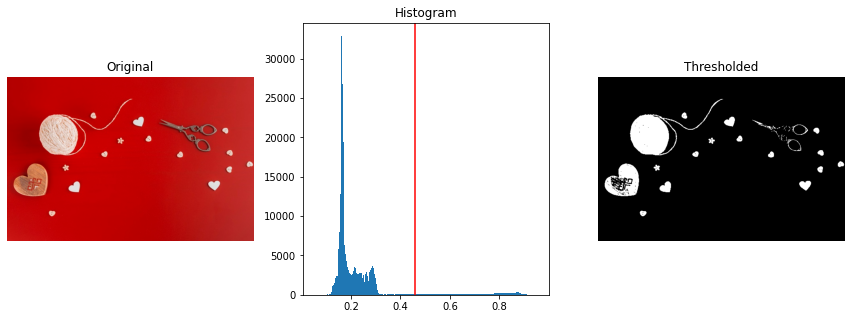

In [ ]:
from skimage.filters import threshold_otsu

thresh = threshold_otsu(image_gray)
binary = image_gray > thresh

fig, axes = plt.subplots(ncols=3, figsize=(15, 5))
ax = axes.ravel()


ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

ax[0].imshow(img_tools, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].hist(image_gray.ravel(), bins=256)
ax[1].set_title('Histogram')

ax[1].set_aspect(aspect="auto")
ax[1].axvline(thresh, color='r')

ax[2].imshow(binary, cmap=plt.cm.gray)
ax[2].set_title('Thresholded')
ax[2].axis('off')

plt.show()

## Local Thresholding

Thresholding happens in regions, whereby to process a pixel, only the neighboring pixels are used. These algorithms often require more computation time.

Image shape (191, 384)


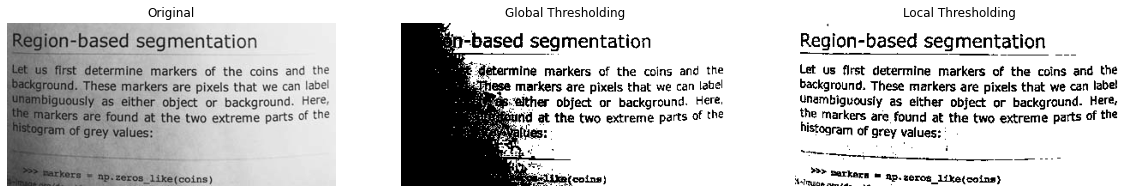

In [ ]:
from skimage.filters import threshold_otsu, threshold_local

image = data.page() # Grayscale image
print('Image shape', image.shape)

"Apply Global Thresholding"
global_thresh = threshold_otsu(image)
binary_global = image > global_thresh



"Apply Local Thresholding"
# Set the block size to 35
block_size = 35
local_thresh = threshold_local(image, block_size, offset=10)
binary_local = image > local_thresh


"Plot the images"

plt.figure(figsize=(20, 12))

ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2)
ax3 = plt.subplot(1, 3, 3, sharex=ax1, sharey=ax2)

ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Original')
ax1.axis('off')

ax2.imshow(binary_global, cmap=plt.cm.gray)
ax2.set_title('Global Thresholding')
ax2.axis('off')

ax3.imshow(binary_local, cmap=plt.cm.gray)
ax3.set_title('Local Thresholding')
ax3.axis('off')


plt.show()

# Contrast Enhancement

The contrast of an image can be seen as a measure of its dynamic range ot the spread of the histogramm. Two of the methods for contrast enhacmenet are: 
* Contrast stretching (stretch the histogram so the full range of intensity values of the image is used)
* Histogramm equalization (spreads out the most frequent intensity values using probability distribution)

In [ ]:
# Skimage provides several methods for contrast enhancement
from skimage import exposure

Take a look at an image with low contrast

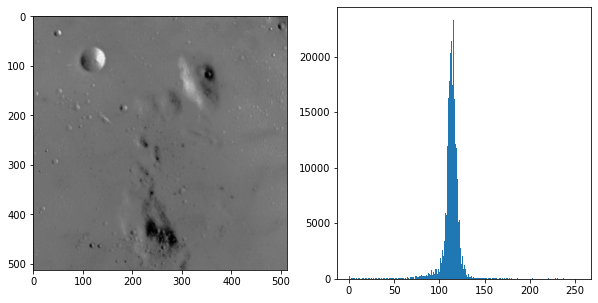

In [ ]:
img = data.moon()

plt.figure(figsize=(10, 5))
sp1 = plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')

sp2 = plt.subplot(1,2,2)
plt.hist(img.ravel(), bins=255)
plt.show()

**Contrast Stretching**

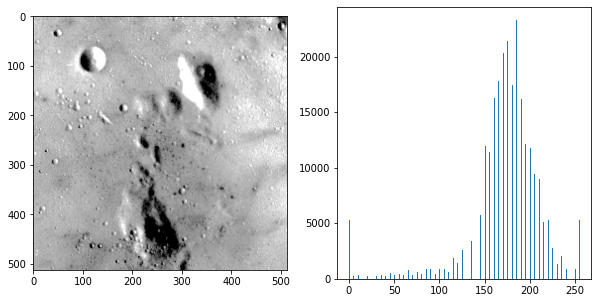

In [ ]:
# image_eq = exposure.equalize_hist(img)

p2, p98 = np.percentile(img, (2, 98))
img_rescale = exposure.rescale_intensity(img, in_range=(p2, p98))

plt.figure(figsize=(10, 5))
sp1 = plt.subplot(1,2,1)
plt.imshow(img_rescale, cmap='gray')

sp2 = plt.subplot(1,2,2)
plt.hist(img_rescale.ravel(), bins=255)
plt.show()

**Global Histogram Equalization**

Global Histogram equlization



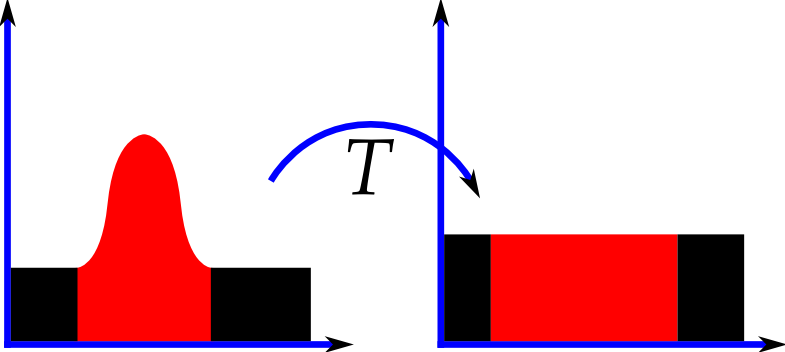

In [ ]:
from IPython import display
print('Global Histogram equlization')
print()
display.Image("https://upload.wikimedia.org/wikipedia/commons/c/ca/Histogrammeinebnung.png")

**Local Histogram Equalization**

Eenhances an image with low contrast, using a method called local histogram equalization, which spreads out the most frequent intensity values in an image.

**Globally** equalized image has a roughly linear cumulative distribution function for each pixel neighborhood.<br>

The **local version** of the histogram equalization emphasized every local graylevel variations.<br>
These algorithms can be used on both 2D and 3D images.<br>

References:
https://en.wikipedia.org/wiki/Histogram_equalization<br>
https://en.wikipedia.org/wiki/Adaptive_histogram_equalization

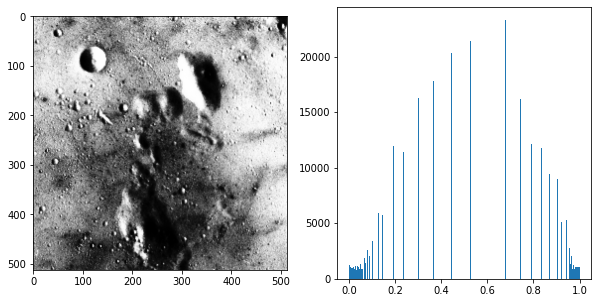

In [ ]:
image_eq = exposure.equalize_hist(img)
plt.figure(figsize=(10, 5))
sp1 = plt.subplot(1,2,1)
plt.imshow(image_eq, cmap='gray')

sp2 = plt.subplot(1,2,2)
plt.hist(image_eq.ravel(), bins=255)
plt.show()

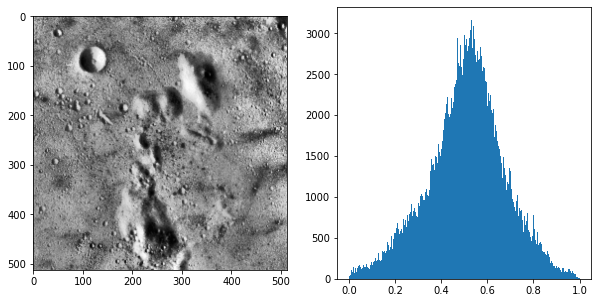

In [ ]:
image_adapt_hist = exposure.equalize_adapthist(img, clip_limit=0.057) # clip_limit: higher values give higher contrast

"""
Contrast Limited Adaptive Histogram Equalization (CLAHE).

An algorithm for local contrast enhancement, that uses histograms computed
over different tile regions of the image. Local details can therefore be
enhanced even in regions that are darker or lighter than most of the image.
"""

plt.figure(figsize=(10, 5))
sp1 = plt.subplot(1,2,1)
plt.imshow(image_adapt_hist, cmap='gray')

sp2 = plt.subplot(1,2,2)
plt.hist(image_adapt_hist.ravel(), bins=255)
plt.show()

# Convolution

In the computer vision domain the Covolution is actually what is reffered to Cross Correlation in Math and other disciplins. 


Convolutional Operation



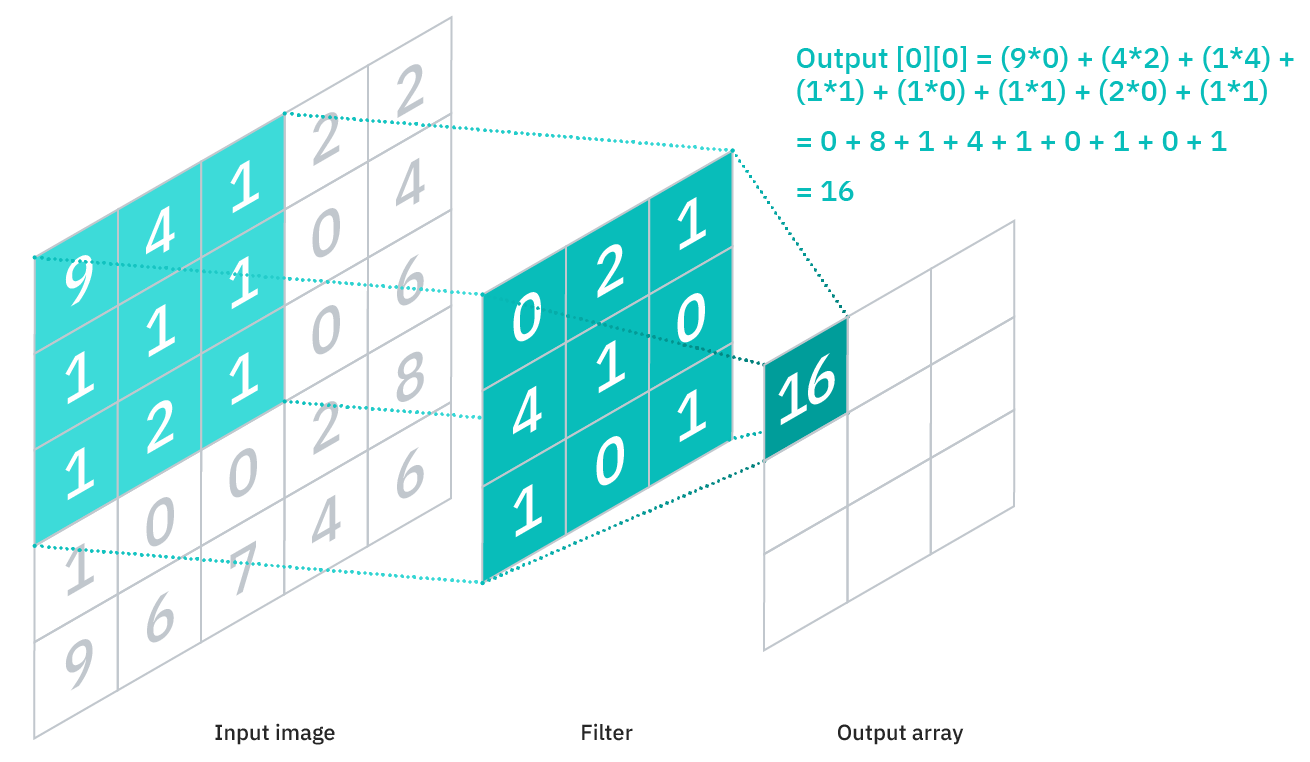

In [ ]:
print('Convolutional Operation')
print()
display.Image("https://1.cms.s81c.com/sites/default/files/2021-01-06/ICLH_Diagram_Batch_02_17A-ConvolutionalNeuralNetworks-WHITEBG.png")

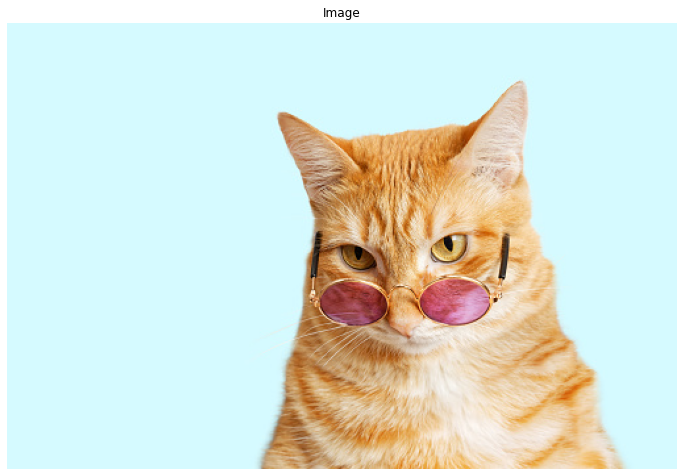

In [ ]:
show_image(image_array)

Bluring an image with **Gaussian Kernel**



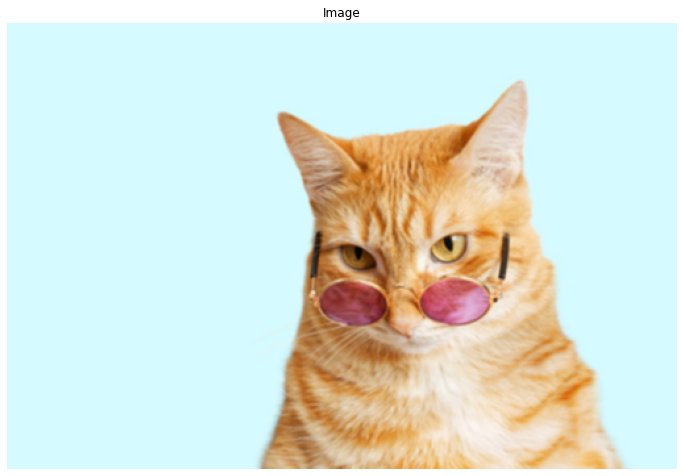

In [ ]:
gauss_blur = (1/16) * np.array([[1, 2, 1],
                                [2, 4, 2],
                                [1, 2, 1]])

image_blurred = cv2.filter2D(image_array, -1, gauss_blur)
show_image(image_blurred)

Sharpening an image

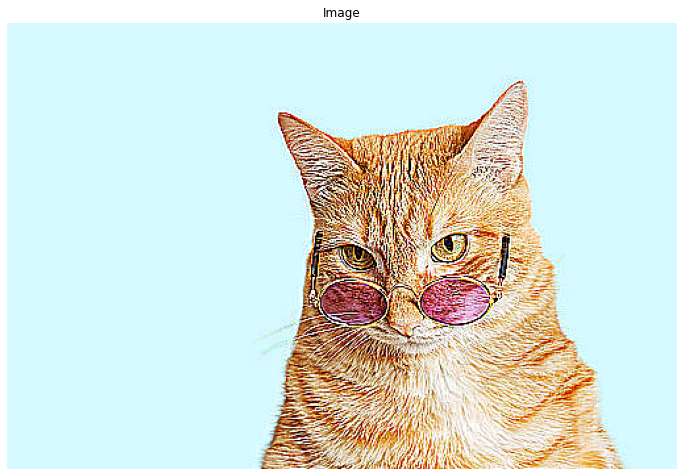

In [ ]:
sharpen = np.array([[-1, -1, -1],
                    [-1,  9, -1],
                    [-1, -1, -1]])

image_sharpen = cv2.filter2D(image_array, -1, sharpen)
show_image(image_sharpen)

Laplacian Filter

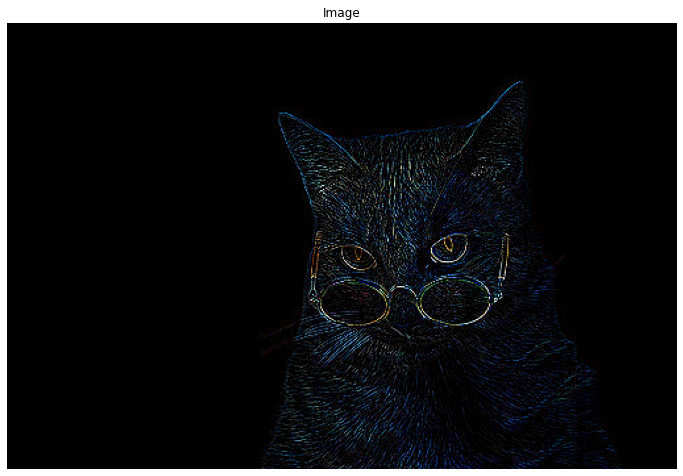

In [ ]:
# construct the Laplacian kernel used to detect edge-like
# regions of an image
laplacian = np.array(([0, 1, 0],
                      [1, -4, 1],
                      [0, 1, 0]), dtype="int")

image_laplacian = cv2.filter2D(image_array, -1, laplacian)
show_image(image_laplacian)

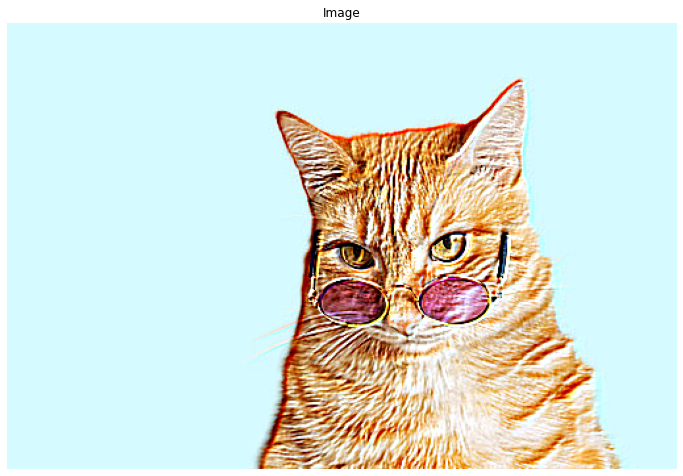

In [ ]:
emboss = np.array([[-2, -1, 0],
                   [-1,  1, 1],
                   [ 0,  1, 2]])

image_emboss = cv2.filter2D(image_array, -1, emboss)
show_image(image_emboss)

# Edge Detection

## Edge Detection using Sobel Gradient Operator

More information [HERE](https://docs.opencv.org/3.4/d2/d2c/tutorial_sobel_derivatives.html)

In [ ]:
url = 'https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png'
lena = load_from_url(url)
print(lena.shape)

(512, 512, 3)


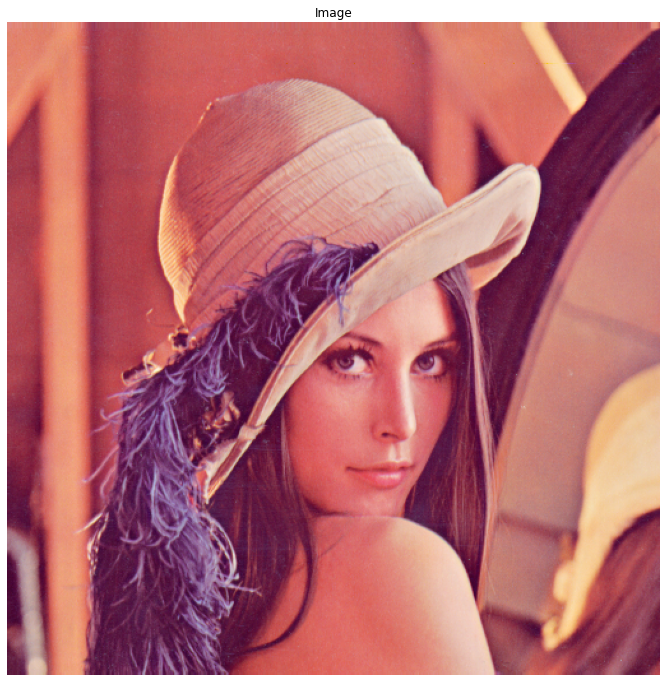

In [ ]:
lena_rgb = BGR2RGB(lena)
show_image(lena_rgb)

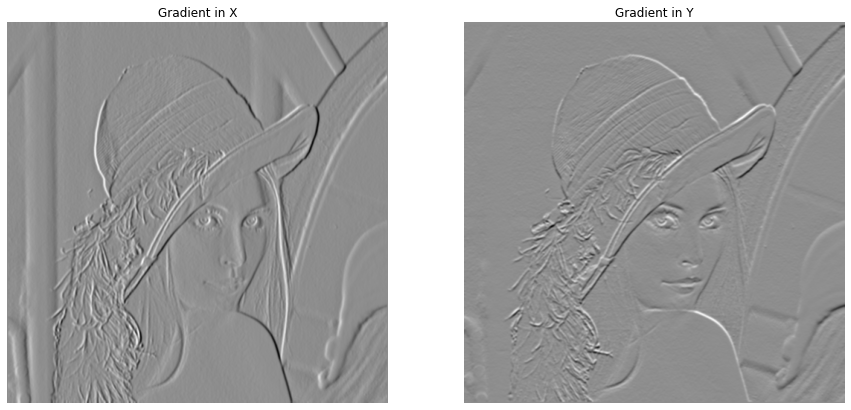

In [ ]:
# Some variables -> read the doc for more info
scale = 1
delta = 0
ddepth = cv2.CV_16S

src = cv2.GaussianBlur(lena, (3, 3), 0)
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

grad_x = cv2.Sobel(gray, ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
grad_y = cv2.Sobel(gray, ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)


# Show the gradients
fig, axes = plt.subplots(ncols=3, figsize=(15, 10))
ax = axes.ravel()

ax[0] = plt.subplot(1, 2, 1)
ax[1] = plt.subplot(1, 2, 2)

ax[0].imshow(grad_x, cmap=plt.cm.gray)
ax[0].set_title('Gradient in X')
ax[0].axis('off')

ax[1].imshow(grad_y, cmap=plt.cm.gray)
ax[1].set_title('Gradient in Y')
ax[1].axis('off')

plt.show()

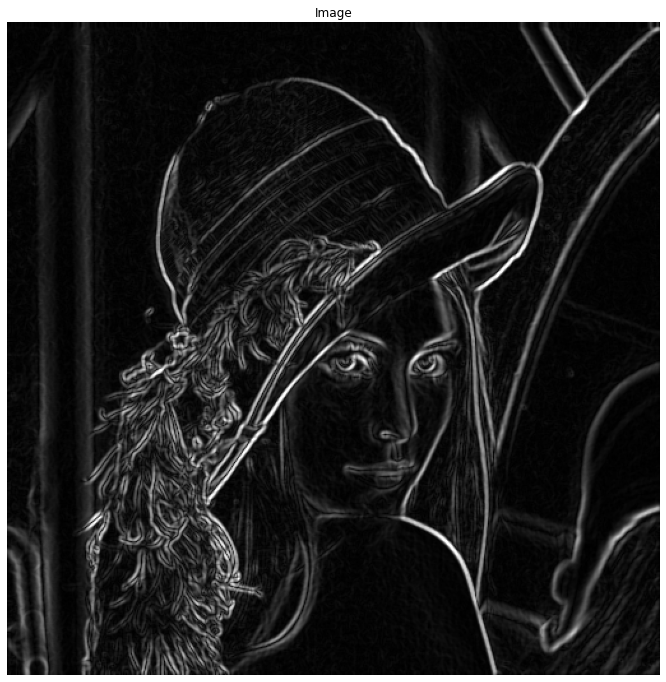

In [ ]:
abs_grad_x = cv2.convertScaleAbs(grad_x)
abs_grad_y = cv2.convertScaleAbs(grad_y)

grad = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)
show_image(grad)

## Edge Detection wtih Canny

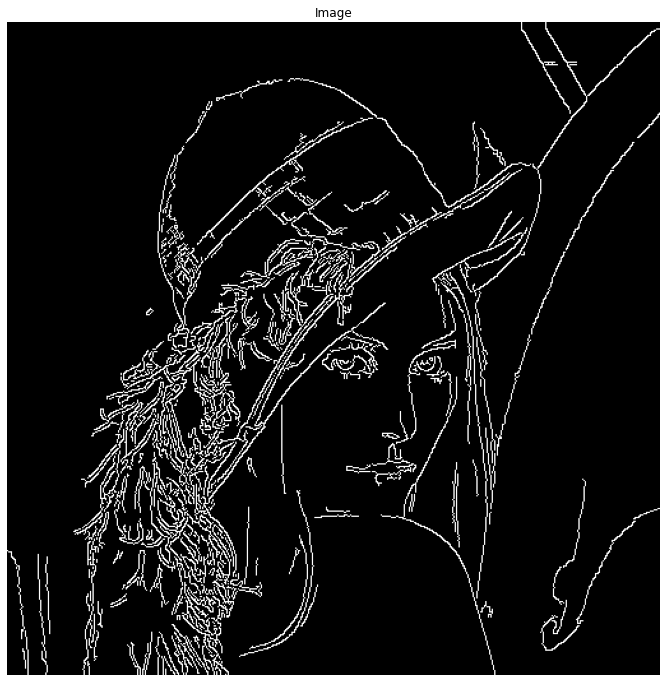

In [ ]:
## Using a Canny

""" 
1. Denoise the image with a Gaussian filter.
2. Calculate the gradients.
3. Apply non-maximum suppression (NMS) on the edges. Basically, this means that the algorithm selects the best edges from a set of overlapping edges. We'll discuss the concept of NMS in detail in Chapter 7, Building Custom Object Detectors.
4. Apply a double threshold to all the detected edges to eliminate any false positives.
5. Analyze all the edges and their connection to each other to keep the real edges and discard the weak ones.

More info here: https://docs.opencv.org/3.4/da/d22/tutorial_py_canny.html
"""

canny_lena = cv2.Canny(lena_rgb, 100, 250)
show_image(canny_lena)

# Contour Detection

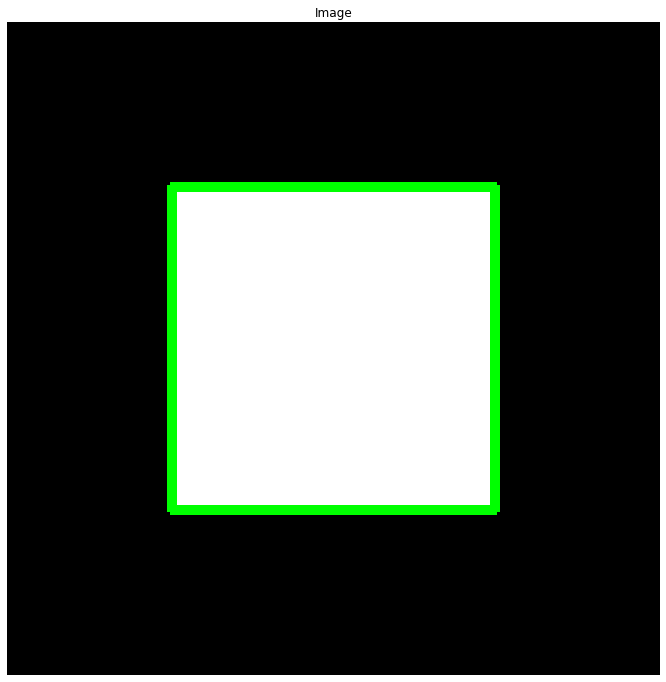

In [ ]:
import cv2
import numpy as np

img = np.zeros((200, 200), dtype=np.uint8)
img[50:150, 50:150] = 255

ret, thresh = cv2.threshold(img, 127, 255, 0)
contours, hier = cv2.findContours(thresh, cv2.RETR_TREE,
                                  cv2.CHAIN_APPROX_SIMPLE)
color = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
img = cv2.drawContours(color, contours, -1, (0,255,0), 2)
show_image(img)

# Bounding box, minimum area rectangle, and minimum enclosing circle

In a real-life application, we would be most interested in determining the bounding box of the subject, its minimum enclosing rectangle, and its enclosing circle. The cv2.findContours function, in conjunction with a few other OpenCV utilities, makes this very easy to accomplish. *(Learning OpenCV 4 Computer Vision with Python 3 - Third Edition)* 

What are contours?

Contours can be explained simply as a curve joining all the continuous points (along the boundary), having same color or intensity. The contours are a useful tool for shape analysis and object detection and recognition.<br>

* For better accuracy, use binary images. So before finding contours, apply threshold or canny edge detection.
* Since OpenCV 3.2, findContours() no longer modifies the source image.
In OpenCV, finding contours is like finding white object from black background. * So remember, object to be found should be white and background should be black.

Shape of the image is:  (448, 663, 3)


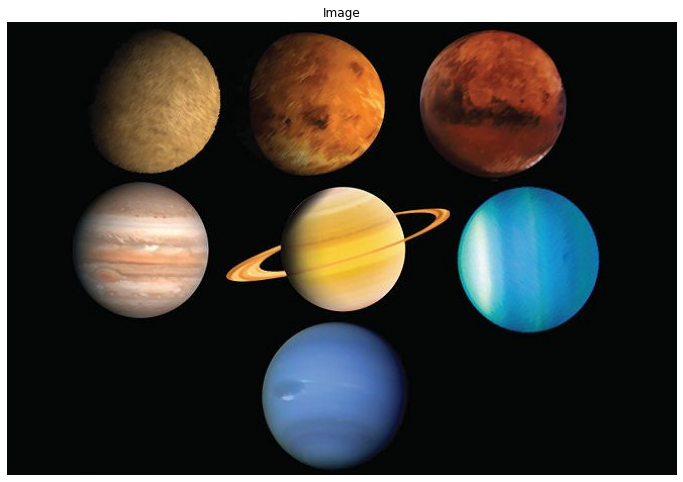

In [ ]:
url = 'https://geekscoders.com/wp-content/uploads/2021/03/planet.jpg'

planets = load_from_url(url)
print('Shape of the image is: ', planets.shape)
planets_rgb = BGR2RGB(planets)
show_image(planets_rgb)

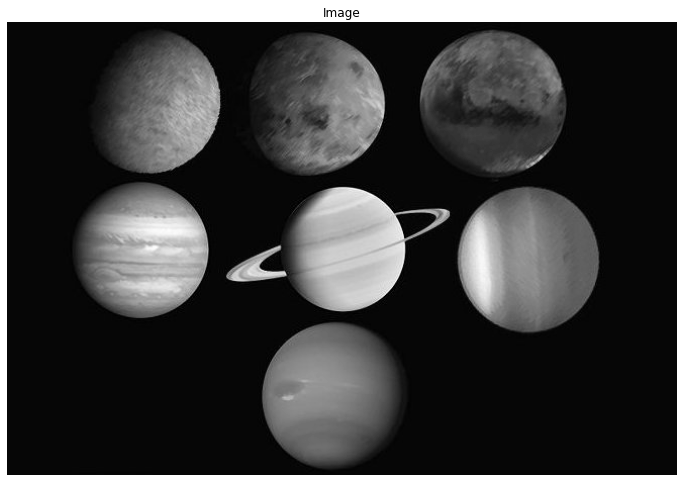

In [ ]:
planets_gray = cv2.cvtColor(planets, cv2.COLOR_BGR2GRAY)
show_image(planets_gray)

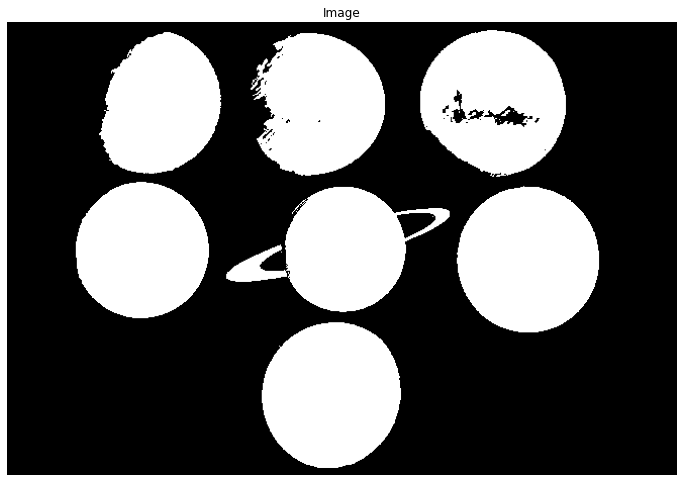

In [ ]:
# ret, thresh = cv2.threshold(planets_gray, 75, 255, 0)
ret, thresh = cv2.threshold(planets_gray, 30, 255, 0)
show_image(thresh)

There are three arguments in **cv.findContours()** function, 
* first one is source image, 
* second is contour retrieval mode: <br> One of the supported values is cv2.RETR_TREE, which tells the function to retrieve the entire hierarchy of external and internal contours. These relationships may matter if we are searching for smaller objects (or smaller regions) inside larger objects (or larger regions). If you only want to retrieve the most external contours, use cv2.RETR_EXTERNAL. This may be a good choice in cases where the objects appear on a plain background and we do not care about finding objects within objects.
* third is contour approximation method:<br> Contours are the boundaries of a shape with same intensity. It stores the (x,y) coordinates of the boundary of a shape. But does it store all the coordinates ? That is specified by this contour approximation method. <br>


And it outputs the contours and hierarchy. Contours is a Python list of all the contours in the image. Each individual contour is a Numpy array of (x,y) coordinates of boundary points of the object.

In [ ]:
"Find the countours and their hierarchy based on a certain threshold"

contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

## Draw the contours found

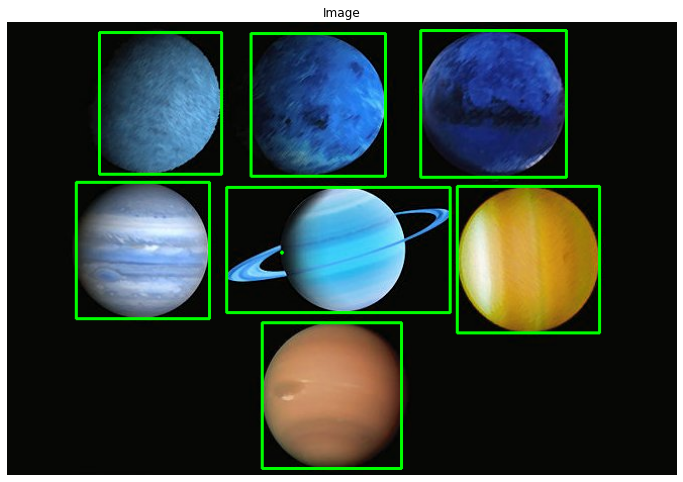

In [ ]:
for c in contours:
    # find bounding box coordinates
    x,y,w,h = cv2.boundingRect(c)
    cv2.rectangle(planets, (x,y), (x+w, y+h), (0, 255, 0), 2)

show_image(planets)

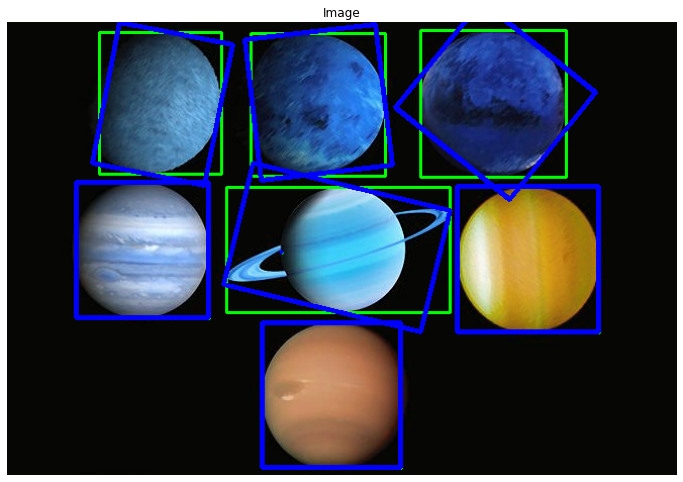

In [ ]:
for c in contours:

    # find minimum area
    rect = cv2.minAreaRect(c)
    # calculate coordinates of the minimum area rectangle
    box = cv2.boxPoints(rect)
    # normalize coordinates to integers
    box = np.int0(box)
    # draw contours
    cv2.drawContours(planets, [box], 0, (0,0, 255), 3)

show_image(planets)

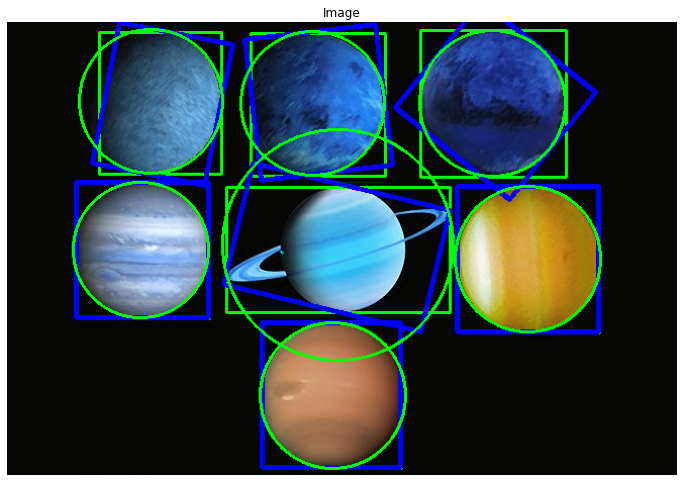

In [ ]:
for c in contours:

    # calculate center and radius of minimum enclosing circle
    (x, y), radius = cv2.minEnclosingCircle(c)
    # cast to integers
    center = (int(x), int(y))
    radius = int(radius)
    # draw the circle
    planets = cv2.circle(planets, center, radius, (0, 255, 0), 2)

show_image(planets)

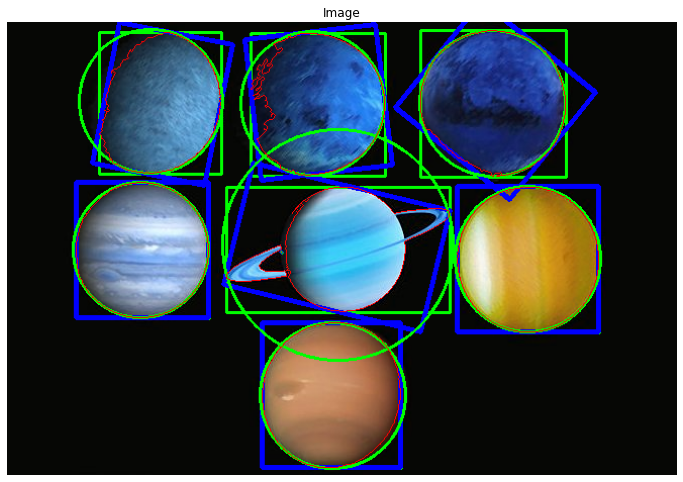

In [ ]:
cv2.drawContours(planets, contours, -1, (255, 0, 0), 1)
show_image(planets)

In [ ]:
# # The whole code all together

# for c in contours:
#     # find bounding box coordinates
#     x,y,w,h = cv2.boundingRect(c)
#     cv2.rectangle(planets, (x,y), (x+w, y+h), (0, 255, 0), 2)

#     # find minimum area
#     rect = cv2.minAreaRect(c)
#     # calculate coordinates of the minimum area rectangle
#     box = cv2.boxPoints(rect)
#     # normalize coordinates to integers
#     box = np.int0(box)
#     # draw contours
#     cv2.drawContours(planets, [box], 0, (0,0, 255), 3)

#     # calculate center and radius of minimum enclosing circle
#     (x, y), radius = cv2.minEnclosingCircle(c)
#     # cast to integers
#     center = (int(x), int(y))
#     radius = int(radius)
#     # draw the circle
#     planets = cv2.circle(planets, center, radius, (0, 255, 0), 2)

# cv2.drawContours(planets, contours, -1, (255, 0, 0), 1)
# show_image(planets)

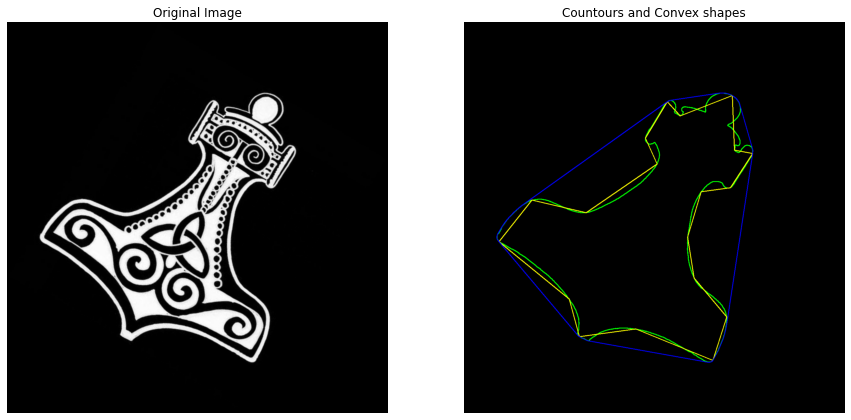

In [ ]:
url = 'https://raw.githubusercontent.com/PacktPublishing/Learning-OpenCV-4-Computer-Vision-with-Python-Third-Edition/master/chapter03/hammer.jpg'
img = load_from_url(url)

ret, thresh = cv2.threshold(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY),
                            127, 255, cv2.THRESH_BINARY)

contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL,
                                  cv2.CHAIN_APPROX_SIMPLE)

black = np.zeros_like(img)
for cnt in contours:


    epsilon = 0.01 * cv2.arcLength(cnt,True)
    approx = cv2.approxPolyDP(cnt,epsilon,True)

    """
    cv2.approxPolyDP(): params

    1. A contour.
    2. An epsilon value representing the maximum discrepancy between the original contour and the approximated polygon (the lower the value, the closer the approximated value will be to the original contour).
    3. A Boolean flag. If it is True, it signifies that the polygon is closed.

    # Effectively, we're instructing OpenCV to calculate 
    # an approximated polygon whose perimeter can only differ 
    # from the original contour by an epsilon ratio – specifically, 1% of the original arc length.
    
    """
    hull = cv2.convexHull(cnt)
    cv2.drawContours(black, [cnt], -1, (0, 255, 0), 2)
    cv2.drawContours(black, [approx], -1, (255, 255, 0), 2)
    cv2.drawContours(black, [hull], -1, (0, 0, 255), 2)


# Show contours and convex shape
fig, axes = plt.subplots(ncols=3, figsize=(15, 10))
ax = axes.ravel()

ax[0] = plt.subplot(1, 2, 1)
ax[1] = plt.subplot(1, 2, 2)

ax[0].imshow(img, cmap=plt.cm.gray)
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(black, cmap=plt.cm.gray)
ax[1].set_title('Countours and Convex shapes')
ax[1].axis('off')

plt.show()

# Credits



1.   Joseph Howse , Joe Minichino - Learning OpenCV 4 Computer Vision with Python 3 - Third Edition, [GitHub](https://github.com/PacktPublishing/Learning-OpenCV-4-Computer-Vision-with-Python-Third-Edition)
2.   Adrian Rosebrock, PhD - [pyimagesearch.com](https://www.pyimagesearch.com/)
3.   Official documentation of libraries used